In [55]:
import requests as req
import json
import pandas as pd
import numpy as np
import datetime
import os
from matplotlib.finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [56]:
files = os.listdir('historical_data')
for file in files:
    if file[0:3]=='BTC':
        btc_df = pd.read_csv('historical_data/%s'%file)
        print('BTC dataframe generated')
    elif file[0:3]=='ETH':
        eth_df = pd.read_csv('historical_data/%s'%file)
        print('ETH dataframe generated')
    elif file[0:3]=='LTC':
        ltc_df =  pd.read_csv('historical_data/%s'%file)
        print('LTC dataframe generated')
btc_df.head()

BTC dataframe generated
ETH dataframe generated
LTC dataframe generated


,Unnamed: 0,Date,High,Low,Open,Close
0,0,2016-07-15,680.94,655.72,664.20,670.38
1,1,2016-07-18,673.24,657.82,670.38,664.62
2,2,2016-07-21,669.44,645.69,664.62,659.29
3,3,2016-07-24,662.51,643.49,659.29,654.54
4,4,2016-07-27,657.96,650.81,654.54,654.74


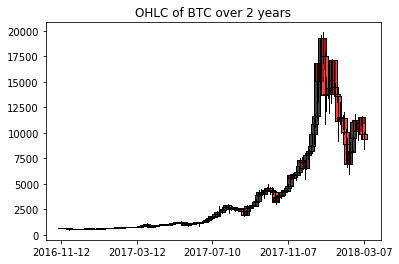

In [57]:
fig, ax = plt.subplots()
candlestick2_ohlc(ax,btc_df['Open'],btc_df['High'],btc_df['Low'],btc_df['Close'])
plt.title('OHLC of BTC over 2 years')

num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()


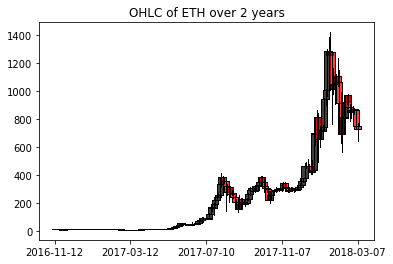

In [58]:
fig, ax = plt.subplots()
candlestick2_ohlc(ax,eth_df['Open'],eth_df['High'],eth_df['Low'],eth_df['Close'])
plt.title('OHLC of ETH over 2 years')

num_ticks = 5

inv_ticks = int(len(eth_df['Date'])/num_ticks)
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()


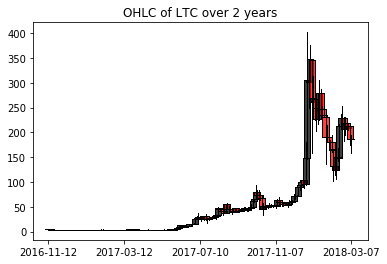

In [59]:
fig, ax = plt.subplots()
candlestick2_ohlc(ax,ltc_df['Open'],ltc_df['High'],ltc_df['Low'],ltc_df['Close'])
plt.title('OHLC of LTC over 2 years')

num_ticks = 5

inv_ticks = int(len(ltc_df['Date'])/num_ticks)
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

# Open flucation analysis (velocity)

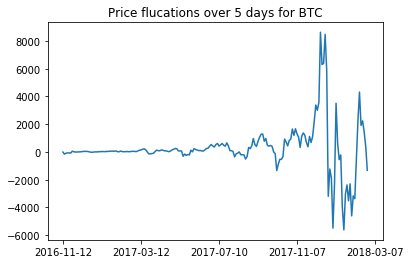

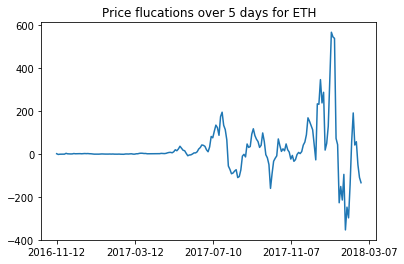

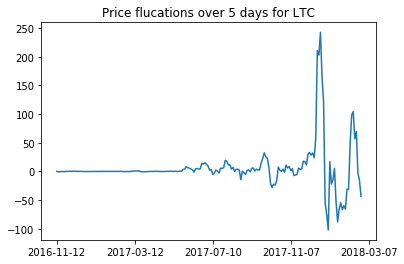

In [60]:
btc_differences = list()
eth_differences = list()
ltc_differences = list()

step = 5

for i in range(len(btc_df['Open'])-step):
    btc_differences.append(btc_df['Open'][i+step]-btc_df['Open'][i])
    eth_differences.append(eth_df['Open'][i+step]-eth_df['Open'][i])
    ltc_differences.append(ltc_df['Open'][i+step]-ltc_df['Open'][i])


num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
    
    
fig, ax = plt.subplots()
plt.plot(btc_differences)
plt.title('Price flucations over %s days for BTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(eth_differences)
plt.title('Price flucations over %s days for ETH'%str(step))
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(ltc_differences)
plt.title('Price flucations over %s days for LTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

In [61]:
top20 = int(len(btc_differences)/5)
top_index_btc = sorted(range(len(btc_differences)), key=lambda i: btc_differences[i])[-top20:]
top_btc = [btc_differences[i] for i in top_index_btc]
top_btc[0:5]

[655.36000000000013,
 678.18000000000029,
 678.84000000000015,
 711.70999999999958,
 766.21000000000004]

# Open flucation analysis (acceleration)

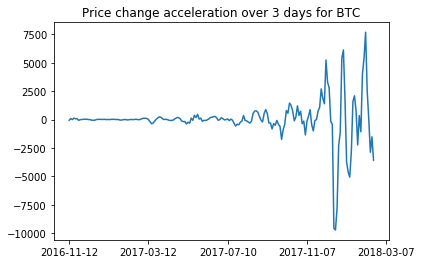

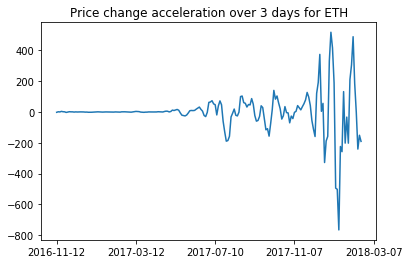

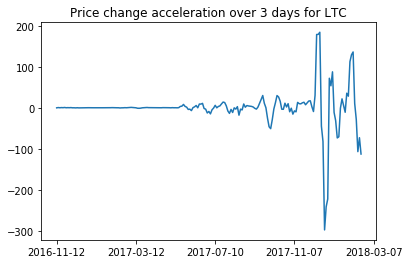

In [62]:
btc_accel = list()
eth_accel = list()
ltc_accel = list()

step = 3

for i in range(len(btc_differences)-step):
    btc_accel.append(btc_differences[i+step]-btc_differences[i])
    eth_accel.append(eth_differences[i+step]-eth_differences[i])
    ltc_accel.append(ltc_differences[i+step]-ltc_differences[i])

num_ticks = 5

inv_ticks = int(len(btc_df['Date'])/num_ticks)
    
    
fig, ax = plt.subplots()
plt.plot(btc_accel)
plt.title('Price change acceleration over %s days for BTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[btc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(eth_accel)
plt.title('Price change acceleration over %s days for ETH'%str(step))
plt.xticks([i for i in range(num_ticks)],[eth_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()
fig, ax = plt.subplots()
plt.plot(ltc_accel)
plt.title('Price change acceleration over %s days for LTC'%str(step))
plt.xticks([i for i in range(num_ticks)],[ltc_df['Date'][inv_ticks*i] for i in range(num_ticks+1)])
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_ticks))
plt.show()

In [ ]:
# find sign changes in acceleration analysis